In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_df = pd.read_csv('emails.csv')
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
ham = spam_df[ spam_df['spam'] == 0  ]
spam = spam_df[ spam_df['spam'] == 1  ]

In [6]:
print('Spam percentage =', (len(spam)/len(spam_df))*100, '%' )

Spam percentage = 23.88268156424581 %


<AxesSubplot: xlabel='spam', ylabel='count'>

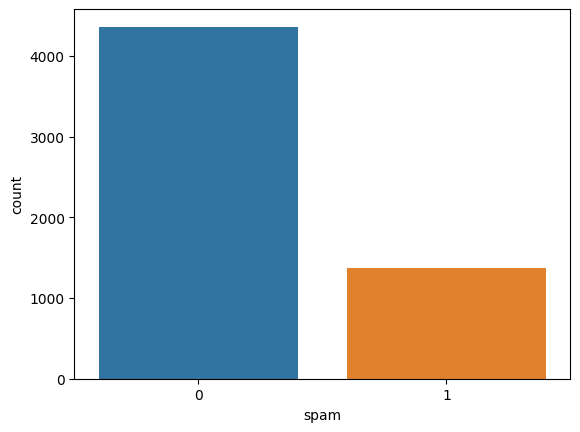

In [15]:
sns.countplot(x=spam_df['spam'])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer()
spamham_vectorizer = vectorizer.fit_transform(spam_df['text'])

In [ ]:
# Return all words
#print(vectorizer.get_feature_names_out)

In [19]:
spamham_vectorizer.shape

(5728, 37303)

In [20]:
label = spam_df['spam'].values

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(spamham_vectorizer, label)

MultinomialNB()

In [22]:
testing_sample = ['Free money!!!', 'Hi Kim, let meknow if you need any further information.']
testing_sample_vect = vectorizer.transform(testing_sample)

In [23]:
test_predict = nb_classifier.predict(testing_sample_vect)

In [24]:
test_predict

array([1, 0], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(spamham_vectorizer,label,test_size=.2)

In [26]:
# new classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# see how he performed with trainning
y_predict_train = nb_classifier.predict(x_train)
y_predict_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

<AxesSubplot: >

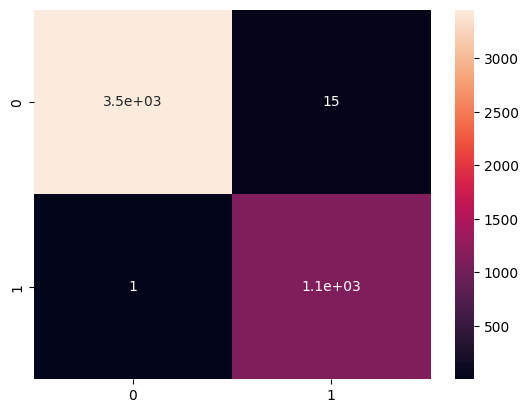

In [29]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<AxesSubplot: >

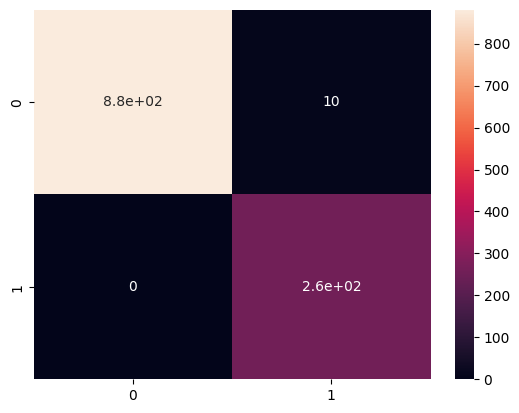

In [30]:
y_predict_test = nb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [31]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       891
           1       0.96      1.00      0.98       255

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

